# **ANN Project**
---
---
## **Bank Customer Exit Prediction**
---
---


**Include Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

**Load Data**

In [2]:
from google.colab import drive

drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv("/content/drive/MyDrive/Physics Wallah | Tensorflow/Data/Churn_Modelling.csv")

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**EDA**

In [5]:
# Drop Unnecessary columns

df = df.drop(["RowNumber","CustomerId","Surname"], axis = 1)

In [6]:

df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**Feature Engineering**

In [7]:
# Encoded the categorical column

geography = pd.get_dummies(data = df["Geography"], drop_first=True)

In [8]:
gender= pd.get_dummies(data = df["Gender"], drop_first=True)

In [9]:
# Replacing these above 2 columns


df = df.drop(["Geography","Gender"], axis = 1)

In [10]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,42,2,0.00,1,1,1,101348.88,1
1,608,41,1,83807.86,1,0,1,112542.58,0
2,502,42,8,159660.80,3,1,0,113931.57,1
3,699,39,1,0.00,2,0,0,93826.63,0
4,850,43,2,125510.82,1,1,1,79084.10,0


In [11]:
# Adding these 2 new columns

df = pd.concat([df, geography, gender],axis = 1)

In [12]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [13]:
df.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Germany', 'Spain',
       'Male'],
      dtype='object')

**SPLIT DATA**

X = df[[

In [14]:
X = df[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Germany', 'Spain',
       'Male']]

In [15]:
y= df["Exited"]

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = 0.8)

In [26]:
X_train.shape

(8000, 11)

In [29]:
y_train.shape

(8000,)

**Scale the data**

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
scaler = StandardScaler()

In [32]:
X_train = scaler.fit_transform(X_train)

In [46]:
X_test.head()

AttributeError: ignored

In [48]:
X_test = scaler.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


**BUILD ANN MODEL**

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [36]:
model = Sequential()

# Intial Layer
model.add(Dense(11, activation = 'relu'))

# Hidden Layer
model.add(Dense(7, activation = 'relu'))
model.add(Dropout(0.3))

model.add(Dense(6, activation = 'relu'))
model.add(Dropout(0.2))

# Output Layer
model.add(Dense(1, activation = 'sigmoid'))

**Introduce CALLBACK**

In [37]:
es_cb = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.0001,
    patience=20,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0
)


In [38]:
model.compile(optimizer = "adam",
              loss = "binary_crossentropy",
              metrics = ["accuracy"])

In [39]:
model.fit(X_train, y_train, validation_split = 0.33, batch_size = 10, epochs = 1000, callbacks = es_cb)

Epoch 1/1000
536/536 [==============================] - 3s 4ms/step - loss: 0.5311 - accuracy: 0.7733 - val_loss: 0.4605 - val_accuracy: 0.7959
Epoch 2/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.4587 - accuracy: 0.8056 - val_loss: 0.4358 - val_accuracy: 0.8084
Epoch 3/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.4423 - accuracy: 0.8132 - val_loss: 0.4237 - val_accuracy: 0.8118
Epoch 4/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.4313 - accuracy: 0.8147 - val_loss: 0.4154 - val_accuracy: 0.8167
Epoch 5/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.4236 - accuracy: 0.8132 - val_loss: 0.4095 - val_accuracy: 0.8129
Epoch 6/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.4205 - accuracy: 0.8214 - val_loss: 0.4017 - val_accuracy: 0.8201
Epoch 7/1000
536/536 [==============================] - 1s 3ms/step - loss: 0.4154 - accuracy: 0.8291 - val_loss: 0.3958 - val_accuracy:

In [40]:
pd.DataFrame(model.history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.531146,0.773279,0.460471,0.795911
1,0.458709,0.805561,0.435793,0.808406
2,0.442332,0.813211,0.423730,0.811814
3,0.431310,0.814704,0.415352,0.816736
4,0.423625,0.813211,0.409496,0.812950
...,...,...,...,...
77,0.348542,0.854077,0.359451,0.848921
78,0.349647,0.856130,0.358636,0.850814
79,0.353659,0.852398,0.360331,0.848164
80,0.351425,0.852398,0.357732,0.850435


<Axes: >

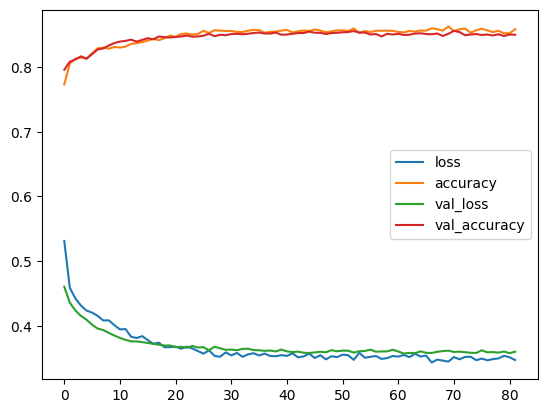

In [41]:
pd.DataFrame(model.history.history).plot()

**Testing on Test Data**

In [42]:
y_test.head()

9394    0
898     1
2398    0
5906    0
2343    0
Name: Exited, dtype: int64

In [51]:
y_pred = model.predict(X_test)

63/63 [==============================] - 0s 2ms/step


In [56]:
y_pred = (y_pred>=0.5)

In [57]:
y_pred

array([[ True],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [ True]])

**Model Performance**

In [58]:
from sklearn.metrics import confusion_matrix

In [63]:
confusion_matrix(y_pred, y_test)

array([[1438,  286],
       [ 157,  119]])

In [64]:
from sklearn.metrics import accuracy_score

accuracy_score(y_pred, y_test)

0.7785